# Session 1

1. Python and Jupyter Notebooks
2. Loading data with Pandas
3. Cleaning the data
4. Adding Molecular Properties using RDKit
5. Data exploration
6. Fingerprints and their similarity

In [1]:
import sys

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !pip install rdkit

In [2]:
import pandas as pd
import math
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, PandasTools, rdMolDescriptors
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import AllChem

PandasTools.RenderImagesInAllColumns = True

## Python and Jupyter Notebooks

A **Jupyter notebook** combines executable code, equations, visualizations, and explanatory text into a single interactive document. It is organized into *cells*, which can be of two main types:
* Rich-text or Markdown cells (like this cell)
* Code cells

You can run (execute) each cell individually by pressing `Shift+Enter` or `Ctrl+Enter`. Once a cell has been executed, all variables, functions, and other definitions remain available to both earlier and later cells in the notebook. Thus, you need to be careful with the order in which you execute your cells!

**Python** is a widely used general-purpose high-level programming language. The term "high-level" means that the language has abstracted away most of the technical details and manages them for you (e.g. memory allocation).

In this course we will use Python xxx (default in Colab as of xxx).

Python programs are built from a few basic elements:
* Variables (e.g., `x`, `y`) – store data
* Objects (e.g., `0`, `True`, `"abc"`) – numbers, boolean, text, lists, etc.
* Operators (e.g., `+`, `==`, `=`) – perform calculations, comparisons, or assignments
* Control flow – if, for, while for logic and loops
* Functions – reusable blocks of code
* Modules – libraries that extend functionality

**Variable, objects, and operators:**

In [3]:
# assignments
x = 1
y = 3

# multiply and assign
z = x * y

print(f"x + y = {z}")

# boolean
b = True
print(f"{b=}")

# strings
x_str = "hello"
y_str = "world"

# plus-operaot on strings
s = x_str + " " + y_str

print(s)

x + y = 3
b=True
hello world


**Lists:**

In [4]:
# create a list
activities = [47, 150.4, 9.2, 42.5]

# access a list (zero-indexed)
first_element = activities[0]
last_element = activities[-1]
activities[2] = 95.3

print(f"{first_element=}, {last_element=}")

# append element to list
activities.append(107.3)

print(f"{activities=}")

first_element=47, last_element=42.5
activities=[47, 150.4, 95.3, 42.5, 107.3]


**Controll flows (for-loops and if-then-else):**

In [5]:
# iterate over list with a for-loop
sum = 0
for n in activities:
    sum += n  # short form for (sum = sum + n)

# devide it by the number of activity values (length of list)
mean_activity = sum / len(activities)

print(f"The mean of {activities} is {mean_activity}nM")

# conditional execution: if-then-else
if mean_activity < 100:
    print(f"Mean activity is below 100nM")
else:
    print(f"Mean activity >= 100nM")

The mean of [47, 150.4, 95.3, 42.5, 107.3] is 88.5nM
Mean activity is below 100nM


**Functions:**

In [6]:
# define a function
def IC50_to_pIC50(IC50_value: float) -> float:
    # pIC50 = - log_10(IC50)
    logIC50 = math.log10(IC50_value)
    return -logIC50

In [7]:
# execute a function
mean_activity_pIC50 = IC50_to_pIC50(mean_activity)

print(f"IC50 = {mean_activity}nM; pIC50 = {mean_activity_pIC50:.3f}nM")

IC50 = 88.5nM; pIC50 = -1.947nM


For a more detailed intro to Python, please refer to:
* https://colab.research.google.com/github/volkamerlab/ai_in_medicine/blob/master/week1_session1_grundkonzepte.ipynb#scrollTo=TYWuwdej6U7A
* Python intro

## Loading data with Pandas
We will work with acticity data of EGFR extracted from Chembl33 (TODO reference data curation). 

**Pandas** is a powerful Python library for data manipulation and analysis. The pandas library has two main containers of data, the `DataFrame` (2D) and the `Series` (1D). 

In [8]:
# read the data from a csv file into a dataframe
egfr_df = pd.read_csv(
    "https://github.com/volkamerlab/cic_summerschool_2025/raw/refs/heads/main/data/EGFR-activities-chembl33.csv",
    index_col=0,
)

# show the first 5 rows
egfr_df.head()

,activities.activity_id,assays.chembl_id,target_dictionary.chembl_id,molecule_dictionary.chembl_id,molecule_dictionary.max_phase,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles,compound_structures.standard_inchi,component_sequences.sequence,assays.confidence_score,docs.chembl_id,docs.year,docs.authors,UniprotID
0,1044894,CHEMBL683040,CHEMBL203,CHEMBL63786,NaN,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,InChI=1S/C18H12BrN3/c19-14-6-3-7-15(10-14)22-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,9,CHEMBL1129035,1996.0,"Rewcastle GW, Palmer BD, Bridges AJ, Showalter...",P00533
1,191437,CHEMBL677389,CHEMBL203,CHEMBL35820,NaN,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,InChI=1S/C18H18BrN3O2/c1-3-23-16-9-14-15(10-17...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1130030,1997.0,"Palmer BD, Trumpp-Kallmeyer S, Fry DW, Nelson ...",P00533
2,1082447,CHEMBL680021,CHEMBL203,CHEMBL53711,NaN,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C15H14BrN5/c1-21(2)14-7-12-13(8-17-14...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1129564,1996.0,"Rewcastle GW, Palmer BD, Thompson AM, Bridges ...",P00533
3,428391,CHEMBL679944,CHEMBL203,CHEMBL66031,NaN,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,InChI=1S/C15H10BrN5/c16-9-2-1-3-10(4-9)21-15-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,1999.0,"Showalter HD, Bridges AJ, Zhou H, Sercel AD, M...",P00533
4,400160,CHEMBL679944,CHEMBL203,CHEMBL53753,NaN,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C14H12BrN5/c1-16-13-6-11-12(7-17-13)1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,1999.0,"Showalter HD, Bridges AJ, Zhou H, Sercel AD, M...",P00533


**Tip**: You can check out available functionalities of a library in this Jupyter notebook, by writing the library name followed by a dot and then hitting the tab key. All available functionalities will pop up for you to explore. Since there are a lot of options, you can narrow it down by writing e.g. `read` while the popup windows is up. 

**Note**: If you are working in in Google Colab you will first have to disable `Automatically trigger code completions` on `Tools` > `Settings` > `Editor` in order to be able to use this feature.

In [9]:
# what are dimentions of the data?
egfr_df.shape

(7287, 16)

In [10]:
print(egfr_df.columns)

Index(['activities.activity_id', 'assays.chembl_id',
       'target_dictionary.chembl_id', 'molecule_dictionary.chembl_id',
       'molecule_dictionary.max_phase', 'activities.standard_type',
       'activities.standard_value', 'activities.standard_units',
       'compound_structures.canonical_smiles',
       'compound_structures.standard_inchi', 'component_sequences.sequence',
       'assays.confidence_score', 'docs.chembl_id', 'docs.year',
       'docs.authors', 'UniprotID'],
      dtype='object')


We can access columns by their name and rows by the index:

In [11]:
egfr_df["molecule_dictionary.chembl_id"][123]

'CHEMBL3357635'

We can also drop colums we are not interested in:

In [12]:
egfr_df = egfr_df.drop(columns=["docs.authors", "docs.year"])
egfr_df.head()

,activities.activity_id,assays.chembl_id,target_dictionary.chembl_id,molecule_dictionary.chembl_id,molecule_dictionary.max_phase,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles,compound_structures.standard_inchi,component_sequences.sequence,assays.confidence_score,docs.chembl_id,UniprotID
0,1044894,CHEMBL683040,CHEMBL203,CHEMBL63786,NaN,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,InChI=1S/C18H12BrN3/c19-14-6-3-7-15(10-14)22-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,9,CHEMBL1129035,P00533
1,191437,CHEMBL677389,CHEMBL203,CHEMBL35820,NaN,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,InChI=1S/C18H18BrN3O2/c1-3-23-16-9-14-15(10-17...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1130030,P00533
2,1082447,CHEMBL680021,CHEMBL203,CHEMBL53711,NaN,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C15H14BrN5/c1-21(2)14-7-12-13(8-17-14...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1129564,P00533
3,428391,CHEMBL679944,CHEMBL203,CHEMBL66031,NaN,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,InChI=1S/C15H10BrN5/c16-9-2-1-3-10(4-9)21-15-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,P00533
4,400160,CHEMBL679944,CHEMBL203,CHEMBL53753,NaN,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C14H12BrN5/c1-16-13-6-11-12(7-17-13)1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,P00533


**Note:** `egfr_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])` does **not** not change the dataframe **but** create a new one, thus only executing `egfr_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])` without assignment will do nothing. If you want to directly manipulate the Dataframe *in-place*, you can use the `inplace=True` option.

Or select those columns, we want to consider:

In [13]:
egfr_activities = egfr_df[
    [
        "molecule_dictionary.chembl_id",
        "activities.standard_type",
        "activities.standard_value",
        "activities.standard_units",
        "compound_structures.canonical_smiles",
    ]
]
egfr_activities.head()

,molecule_dictionary.chembl_id,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles
0,CHEMBL63786,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1,CHEMBL35820,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC
2,CHEMBL53711,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1
3,CHEMBL66031,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
4,CHEMBL53753,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1


In [14]:
egfr_activities.shape

(7287, 5)

Let's rename some of the columns:

In [15]:
egfr_activities = egfr_activities.rename(
    columns={
        "activities.standard_type": "standard_type",
        "activities.standard_value": "standard_value",
        "activities.standard_units": "standard_units",
        "compound_structures.canonical_smiles": "canonical_smiles",
    }
)
egfr_activities

,molecule_dictionary.chembl_id,standard_type,standard_value,standard_units,canonical_smiles
0,CHEMBL63786,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1,CHEMBL35820,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC
2,CHEMBL53711,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1
3,CHEMBL66031,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
4,CHEMBL53753,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1
...,...,...,...,...,...
7282,CHEMBL75718,pIC50,2.619789,nM,N#C/C=C/c1ccc(O)cc1
7283,CHEMBL261238,pIC50,2.301030,nM,CN(c1cccnc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1
7284,CHEMBL76587,pIC50,2.187087,nM,N#CC(C#N)Cc1ccc(O)cc1
7285,CHEMBL490510,pIC50,1.721246,nM,O=C(/C=C/c1ccc(O)c(O)c1)c1ccc(O[C@@H]2O[C@H](C...


In [16]:
egfr_activities.dtypes

molecule_dictionary.chembl_id     object
standard_type                     object
standard_value                   float64
standard_units                    object
canonical_smiles                  object
dtype: object

## Cleaning the data
Before analyzing our dataset, we need to *clean* the data. This includes handling (1) missing values, (2) non-standardized (bioactibity) values, and (3) duplicates.

Let's first handle entries with **missing** (i.e., `None`) **values**:

In [17]:
print(f"Number of entries with missing (None) values:\n{egfr_activities.isna().sum()}")

Number of entries with missing (None) values:
molecule_dictionary.chembl_id    0
standard_type                    0
standard_value                   0
standard_units                   0
canonical_smiles                 7
dtype: int64


As these are only very few samples with missing SMILES, we will simply remove them:

In [18]:
egfr_activities = egfr_activities.dropna(subset="canonical_smiles")
egfr_activities.shape

(7280, 5)

Next, we will **standardize the acticity values**:

In [19]:
egfr_activities["standard_type"].value_counts()

standard_type
pIC50    6896
pKi       254
pKd       130
Name: count, dtype: int64

The standard (bioactivity) values come in different types. Without converting them—which would require additional information such as substrate concentration and the Michaelis constant (see Cheng–Prusoff)—they cannot be compared directly. Therefore, in this analysis we will only consider pIC50 values.

In [20]:
egfr_activities = egfr_activities[egfr_activities["standard_type"] == "pIC50"]
egfr_activities.shape

(6896, 5)

We can now drop the `standard_type` column and rename the `standard_value` column:

In [21]:
egfr_activities = egfr_activities.rename(columns={"standard_value": "pIC50"})
egfr_activities = egfr_activities.drop(columns=["standard_type"])
egfr_activities.head()

,molecule_dictionary.chembl_id,pIC50,standard_units,canonical_smiles
0,CHEMBL63786,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1,CHEMBL35820,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC
2,CHEMBL53711,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1
3,CHEMBL66031,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
4,CHEMBL53753,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1


Let's also ensure whether all pIC50 values have the same unit:

In [22]:
print(f"Unique units: {egfr_activities['standard_units'].unique()}")

Unique units: ['nM']


**Duplicate handling:**

In [23]:
print(
    f"Number of duplicates: {egfr_activities['molecule_dictionary.chembl_id'].duplicated().sum()}"
)

Number of duplicates: 198


There are different approaches, how to deal with duplicates, e.g. simply drop them, use the mean value, ....

Here, we will use the mean pIC50 for duplicates:

In [24]:
egfr_activities_deduplicated = egfr_activities.groupby(
    "molecule_dictionary.chembl_id", as_index=False
).agg(
    {
        "molecule_dictionary.chembl_id": "first",
        "canonical_smiles": "first",
        "pIC50": "mean",
        "standard_units": "first",
    }
)
egfr_activities_deduplicated.head()

,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM


As a sanity check, we will verify that there are no duplicate SMILES, i.e., entries with different ChEMBL IDs but identical SMILES strings:

In [25]:
print(
    f"Number of duplicated SMILES: {egfr_activities_deduplicated['canonical_smiles'].duplicated().sum()}"
)

Number of duplicated SMILES: 0


Since some rows were removed in this section, creating non-consecutive indices, we reset the indices:

In [26]:
egfr_activities_deduplicated = egfr_activities_deduplicated.reset_index(drop=True)

## Adding Molecular Properties using RDKit
**RDKit** is a powerful library for working with molecules. We will use it to calculate various molecular properties of our EGFR ligands, which will later help us explore and better understand the data. 

In RDKit, we can create RDKit molecule instances from their SMILES:

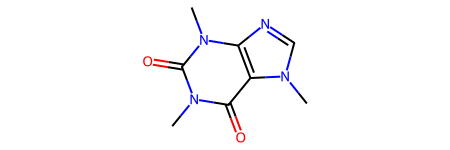

In [27]:
smiles_caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
caffeine = Chem.MolFromSmiles(smiles_caffeine)
caffeine

We can also caluclate different physiochemical properties of the molcule:

In [28]:
print(f"MolWt: {Descriptors.MolWt(caffeine)}")
print(f"logP: {Descriptors.MolLogP(caffeine)}")
print(f"Num HBA: {rdMolDescriptors.CalcNumHBA(caffeine)}")
print(f"Num HBD: {rdMolDescriptors.CalcNumHBD(caffeine)}")

MolWt: 194.194
logP: -1.0293
Num HBA: 6
Num HBD: 0


To add the molecular weight and logP to the our EGFR compound dataset, we first create RDKit molecular instances from their SMILES:

/opt/homebrew/Caskroom/miniforge/base/envs/py310_caddseminar2024/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,
...,...,...,...,...,...
6693,CHEMBL96627,COc1ccc2ncnc(Nc3cccc(Br)c3)c2c1OC,5.864231,nM,
6694,CHEMBL96780,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N,8.420216,nM,
6695,CHEMBL97162,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2[C@H]2CC[C@H](O...,7.080922,nM,
6696,CHEMBL98798,COc1cc2ncnc(Oc3cccc(Br)c3)c2cc1OC,5.119186,nM,

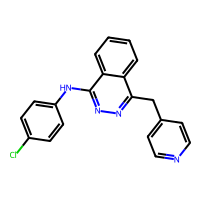
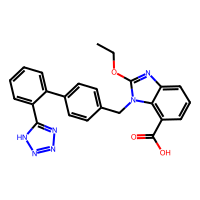
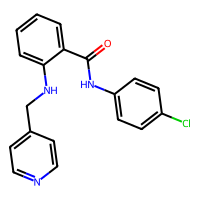
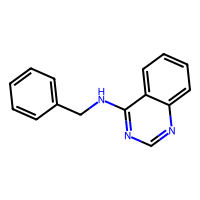
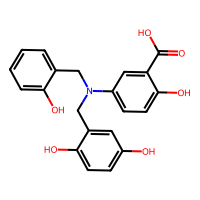
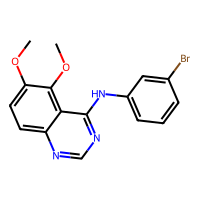
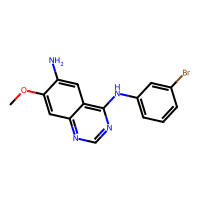
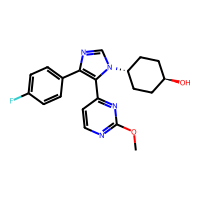
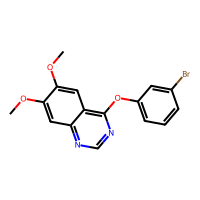
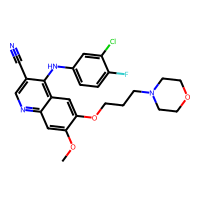

In [29]:
PandasTools.AddMoleculeColumnToFrame(egfr_activities_deduplicated, "canonical_smiles")
egfr_activities_deduplicated

/opt/homebrew/Caskroom/miniforge/base/envs/py310_caddseminar2024/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol,mol_weight,logP,morgan_fp,maccs_fp,dice_similarity
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,,346.821,5.01260,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,,440.463,4.02860,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,,337.810,4.59940,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,,235.290,3.24190,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,,381.384,3.41400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
...,...,...,...,...,...,...,...,...,...,...
6693,CHEMBL96627,COc1ccc2ncnc(Nc3cccc(Br)c3)c2c1OC,5.864231,nM,,360.211,4.15310,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
6694,CHEMBL96780,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N,8.420216,nM,,345.200,3.72670,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
6695,CHEMBL97162,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2[C@H]2CC[C@H](O...,7.080922,nM,,368.412,3.63080,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None
6696,CHEMBL98798,COc1cc2ncnc(Oc3cccc(Br)c3)c2cc1OC,5.119186,nM,,361.195,4.20180,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None

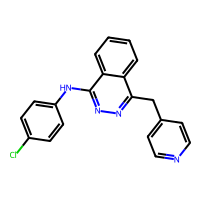
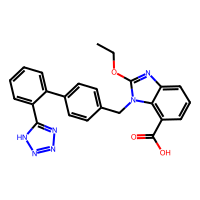
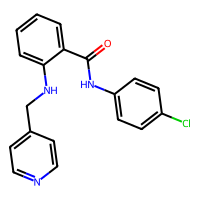
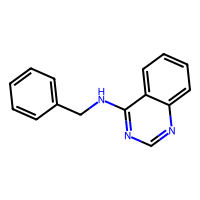
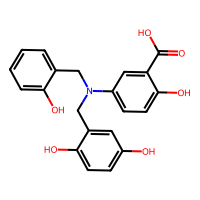
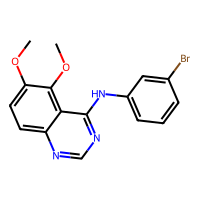
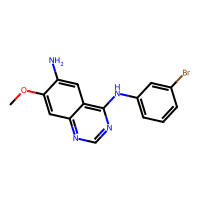
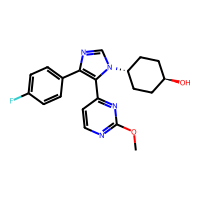
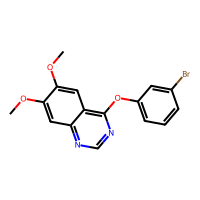
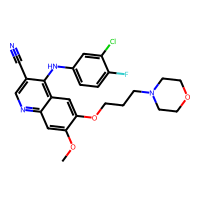

In [ ]:
egfr_activities_deduplicated["mol_weight"] = egfr_activities_deduplicated[
    "ROMol"
].apply(Descriptors.MolWt)
egfr_activities_deduplicated

/opt/homebrew/Caskroom/miniforge/base/envs/py310_caddseminar2024/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol,mol_weight,logP
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,,346.821,5.01260
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,,440.463,4.02860
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,,337.810,4.59940
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,,235.290,3.24190
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,,381.384,3.41400
...,...,...,...,...,...,...,...
6693,CHEMBL96627,COc1ccc2ncnc(Nc3cccc(Br)c3)c2c1OC,5.864231,nM,,360.211,4.15310
6694,CHEMBL96780,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N,8.420216,nM,,345.200,3.72670
6695,CHEMBL97162,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2[C@H]2CC[C@H](O...,7.080922,nM,,368.412,3.63080
6696,CHEMBL98798,COc1cc2ncnc(Oc3cccc(Br)c3)c2cc1OC,5.119186,nM,,361.195,4.20180

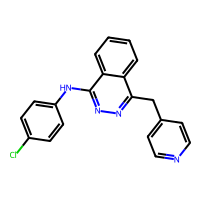
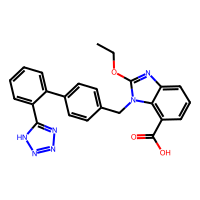
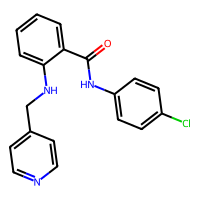
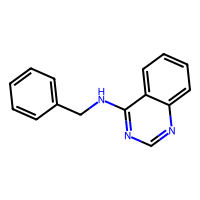
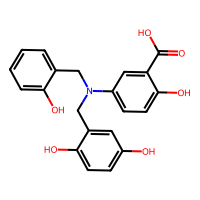
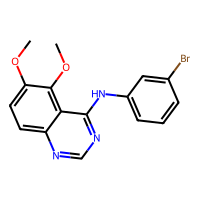
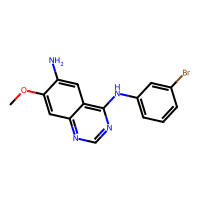
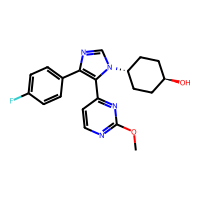
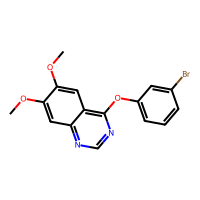
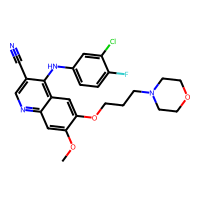

In [31]:
egfr_activities_deduplicated["logP"] = egfr_activities_deduplicated["ROMol"].apply(
    Descriptors.MolLogP
)
egfr_activities_deduplicated

## Data exploration and visualization

In [32]:
egfr_activities_deduplicated.describe()

,pIC50,mol_weight,logP
count,6698.000000,6698.000000,6698.000000
mean,6.876000,456.787818,4.449014
std,1.443117,114.490567,1.410899
min,1.602060,110.112000,-10.326100
25%,5.795880,377.245000,3.590700
50%,6.967988,456.143000,4.422390
75%,8.000000,529.645000,5.299345
max,11.522879,2296.971000,13.028900


We first consider the molecular weight of the compounds:

In [33]:
num_small_molecules = (egfr_activities_deduplicated["mol_weight"] <= 500).sum()
percent_small_molecules = 100 * num_small_molecules / len(egfr_activities_deduplicated)
print(
    f"Molecules with molecular weight <= 500 Da: {num_small_molecules} ({percent_small_molecules:.1f}%)"
)

Molecules with molecular weight <= 500 Da: 4397 (65.6%)


We can also directly create a histogram using the `hist()` function on a Pandas `Series`:

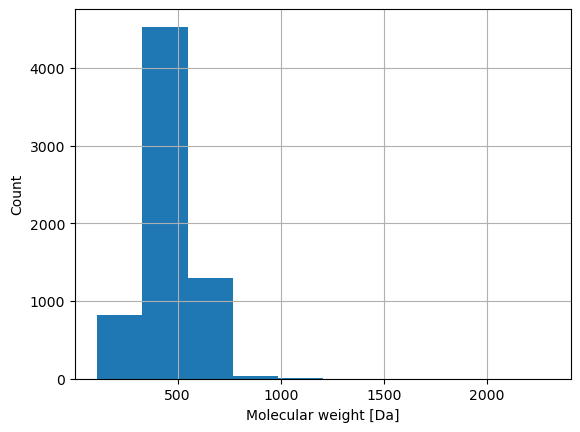

In [34]:
egfr_activities_deduplicated["mol_weight"].hist()
plt.xlabel("Molecular weight [Da]")
plt.ylabel("Count")
plt.show()

A more powerful solution to plot the data are the libraries **seaborn** and **mathplotlib**. 

Let's plot the distribution of pIC50 values:

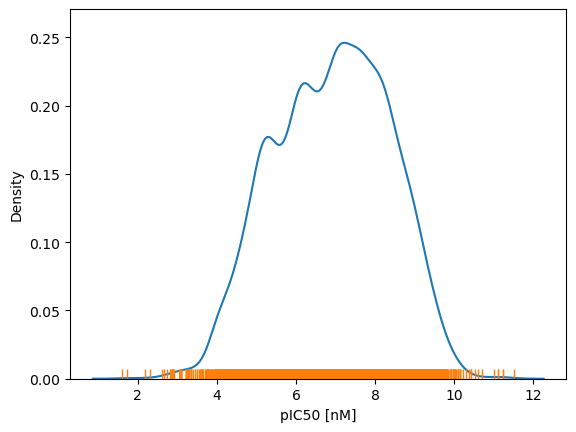

In [35]:
sns.kdeplot(egfr_activities["pIC50"])  # density plot
sns.rugplot(egfr_activities["pIC50"])
plt.xlabel(f"pIC50 [{egfr_activities_deduplicated['standard_units'][0]}]")
plt.show()

We can also look at pairwise relationships of all variables:

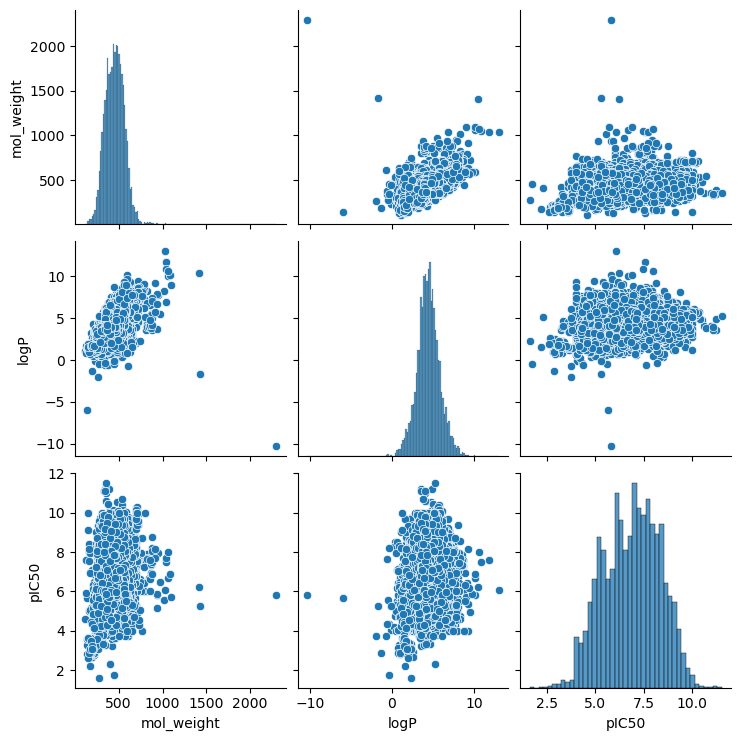

In [36]:
sns.pairplot(egfr_activities_deduplicated[["mol_weight", "logP", "pIC50"]])
plt.show()

## Fingerprints and their similarity
Since the molecular properties we explored do not strongly correlate with activity values, topological fingerprints are commonly used to represent molecules for machine learning models and to quantify similarity between molecules. In this section, we will generate *Morgan* fingerprints and calculate pairwise similarity using the *Tanimoto* coefficient.

/opt/homebrew/Caskroom/miniforge/base/envs/py310_caddseminar2024/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol,mol_weight,logP,morgan_fp
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,,346.821,5.01260,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,,440.463,4.02860,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,,337.810,4.59940,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,,235.290,3.24190,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,,381.384,3.41400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
6693,CHEMBL96627,COc1ccc2ncnc(Nc3cccc(Br)c3)c2c1OC,5.864231,nM,,360.211,4.15310,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6694,CHEMBL96780,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N,8.420216,nM,,345.200,3.72670,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6695,CHEMBL97162,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2[C@H]2CC[C@H](O...,7.080922,nM,,368.412,3.63080,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6696,CHEMBL98798,COc1cc2ncnc(Oc3cccc(Br)c3)c2cc1OC,5.119186,nM,,361.195,4.20180,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

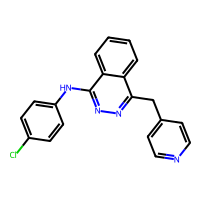
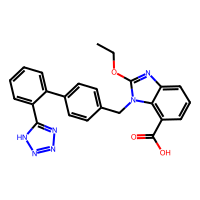
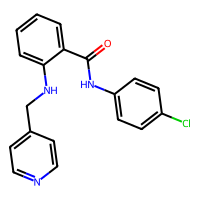
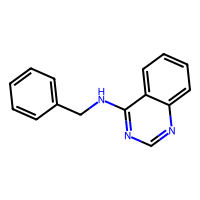
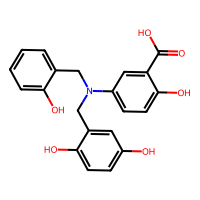
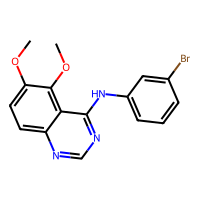
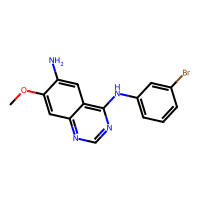
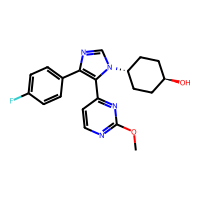
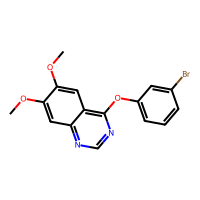
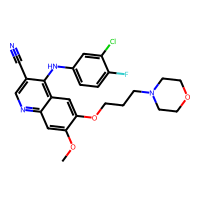

In [37]:
fpgen = AllChem.GetMorganGenerator(radius=2, fpSize=1024)

egfr_activities_deduplicated["morgan_fp"] = egfr_activities_deduplicated["ROMol"].apply(
    fpgen.GetFingerprint
)
egfr_activities_deduplicated

The Tanimoto similarity between the first two compounds:

Tanimoto coefficient: 0.15


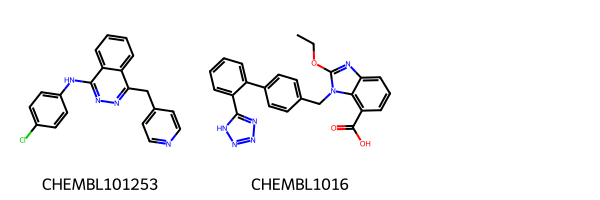

In [38]:
similarity = DataStructs.TanimotoSimilarity(
    egfr_activities_deduplicated["morgan_fp"][0],
    egfr_activities_deduplicated["morgan_fp"][1],
)

print(f"Tanimoto coefficient: {similarity:.2f}")

Chem.Draw.MolsToGridImage(
    egfr_activities_deduplicated["ROMol"][:2],
    legends=list(egfr_activities_deduplicated["molecule_dictionary.chembl_id"][:2]),
)

Finally, we save the prepared dataset as a CSV file for use in the next session. Note that in Colab, this file will be lost once the session ends, thus we provide the precalculated file in the repository.

In [39]:
if not IN_COLAB:
    egfr_activities_deduplicated.to_csv(
        "../data/EGFR-activities-prepared.csv",
        columns=[
            "pIC50",
            "standard_units",
            "molecule_dictionary.chembl_id",
            "canonical_smiles",
        ],
    )

## Exercises

### Exercise 1

In [40]:
# Complete the function that converts the pIC50 to IC50
def pIC50_to_IC50(pIC50_value: float) -> float:
    # TODO
    return None

In [41]:
# Use the function to add a IC50 column to the deduplicated egfr dataframe

# TODO

In [42]:
# Plot the distributions of IC50 values

# TODO

# Would you prefer IC50 or pIC50 values for visualization? Why?

### Exercise 2

In [43]:
# Add the following molecular property descriptors to the deduplicated egfr dataframe: number of HBD, HBA, RB

# TODO

In [44]:
# Complete this function that determines how many of the four Ro5 are fulfilles:


def num_ro5(mol_weight, num_HBA, num_HBD, logP) -> int:
    # TODO
    return None

In [45]:
# Add a column to the dataframe that states how many Ro5 rules are fulfilled

# TODO

In [46]:
# Determine how many ligands fulfill all four Ro5

# TODO

### Exercise 3 (Bonus)
The following compound is a highly potent PKA inhibitor. In this exercise, we aim to find the ligand in our dataset that has the highest similarity towards this PKA inhibitor (in terms of the Dice similarity of MACCS fingerprints). 

In [47]:
# Add the MACCS fingerprints of each compound to the dataframe using RDKit functionality

# TODO

egfr_activities_deduplicated["maccs_fp"] = None

In [48]:
# Calculate the Dice similarity between each compound towards the PKA inhibitor and save it as new column in the dataframe

# TODO

egfr_activities_deduplicated["dice_similarity"] = None

In [49]:
# Sort the dataframe in descenting order on the 'dice_similarity', and display the 3 most similar compounds